In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# File to Load (Remember to change these)
city_data = "C:/Users/y-zem/Desktop/HOMEWORK/Pyber/data/city_data.csv"
ride_data = "C:/Users/y-zem/Desktop/HOMEWORK/Pyber/data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
merged_df = city_df.merge(ride_df, on = 'city')

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [44]:
#color scheme 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}


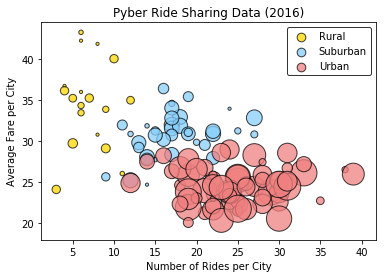

In [42]:
#BUBLLE CHART

#group be city name
by_city = merged_df.groupby('city')

# avg fare by city
avg_fare = by_city.mean()['fare']

#rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
urban = city_info[city_info['Type of City'] == 'Urban']
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']

#Color Dictionary 
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}


# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()


Text(0.5,1,'% of Total Fares by City Type')

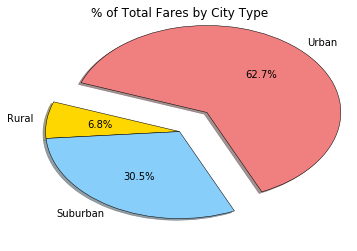

In [50]:
#'% of Total Fares by City Type

#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#Build Pie Chart
labels = fare_sum.index

#colors and explod the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')

#'% of Total Fares by City Typeplt.show()

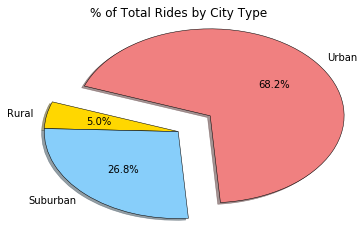

In [31]:
#'% of Total Rides by City Type

#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['ride_id']

#Build Pie Chart
labels = fare_sum.index

#colors and explod the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Rides by City Type')

plt.show()

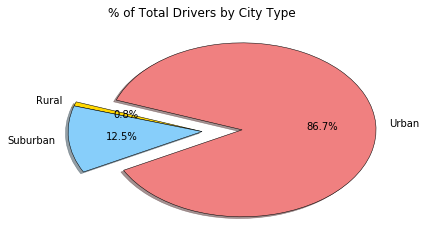

In [33]:
# Total Drivers by City Type

#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['driver_count']

#Build Pie Chart
labels = fare_sum.index

#colors and explod the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Drivers by City Type')

plt.show()